In [1]:
import os 

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.16.1


In [4]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
!pip install pillow

/Users/azarmohammad/.zshenv:.:1: no such file or directory: /Users/azarmohammad/.cargo/env


In [11]:
from PIL import Image

In [12]:
# use the time module in your Python scripts to work with time.
# You can do actions such as retrieving the current time,
# waiting during code execution, and measuring the efficiency of your code.
import time

In [13]:
# It provides functions for working with other functions and 
# callable objects to use or extend them without completely rewriting them.
# This module has two classes – partial and partialmethod.
import functools

In [20]:
def load_image(image):
    max_dim = 512
    image = tf.io.read_file(image)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    image = tf. image.resize(image,new_shape)
    image = image[tf.newaxis,:]
    return image

In [15]:
content_path = "content _image.jpg"
style_path = "style_image.jpg"

In [17]:
def imshow(image, title = None):
    if len(image.shape) > 3:
        image = tf. squeeze(image, axis = 0)
    plt. imshow(image)
    if title:
        plt. title(title)

In [23]:
content_image = load_image(content_path)
style_image = load_image(style_path)

In [24]:
print (content_image.shape, style_image.shape)

(1, 422, 512, 3) (1, 336, 512, 3)


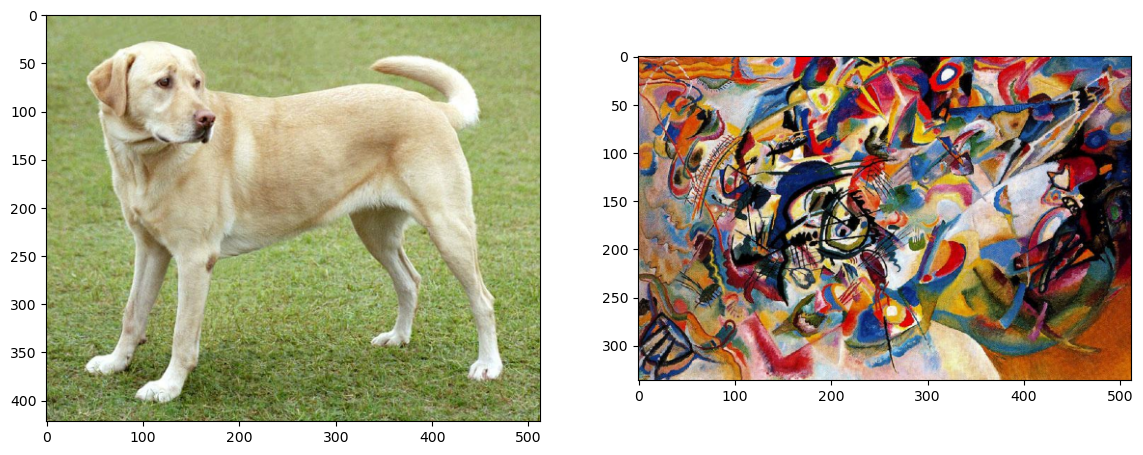

In [25]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
imshow (content_image)
plt. subplot (1,2,2)
imshow(style_image)

In [26]:
x = tf.keras.applications.vgg19.preprocess_input(content_image * 255)
x = tf. image.resize(x, (224, 224))
x. shape

TensorShape([1, 224, 224, 3])

In [27]:
vgg = tf.keras.applications.vgg19.VGG19(weights="imagenet", include_top = False)
vgg. summary ()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
for layer in vgg. layers:
    print (layer.name)

input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [41]:
content_layer = ["block5_conv2"]
style_layers=["block1_conv1",
              "block2_conv1",
              "block3_conv1",
              "block4_conv1",
              "block5_conv1"]

num_content_layers = len(content_layer)
num_style_layers = len(style_layers)

In [34]:
num_content_layers

1

In [35]:
num_style_layers

5

In [38]:
def vgg_layers(layer_names):
    vgg = tf.keras.applications.VGG19(include_top=False, weights="imagenet" )
    vgg. trainable = False
    outputs = [vgg.get_layer(name).output for name in layer_names]
    model = tf.keras.Model([vgg.input], outputs)
    return model

In [43]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image * 255)

In [44]:
style_extractor

<Functional name=functional_3, built=True>

In [45]:
style_outputs

[<tf.Tensor: shape=(1, 336, 512, 64), dtype=float32, numpy=
 array([[[[  0.       ,  70.04077  ,  21.108538 , ...,   0.       ,
            50.03677  ,   0.       ],
          [  0.       , 107.68167  ,  72.24557  , ...,   0.       ,
           223.96979  ,  94.507    ],
          [  0.       , 109.44011  ,  65.68222  , ...,   0.       ,
           196.67754  ,  67.49868  ],
          ...,
          [  0.       ,   0.       ,  40.12754  , ...,   0.       ,
           156.8242   , 133.88821  ],
          [  0.       ,   0.       ,  36.540073 , ...,   0.       ,
           153.07552  , 125.79453  ],
          [  2.3791368,   0.       ,  75.2989   , ...,   0.       ,
           248.84106  , 251.10191  ]],
 
         [[  0.       , 108.96126  ,  37.32049  , ...,   0.       ,
             0.       ,   0.       ],
          [  0.       , 168.64937  , 122.527336 , ...,   0.       ,
           107.52649  , 119.69362  ],
          [  0.       , 167.93271  , 111.88689  , ...,   0.       ,
      

In [46]:
for i in style_outputs:
    print (i.shape)

(1, 336, 512, 64)
(1, 168, 256, 128)
(1, 84, 128, 256)
(1, 42, 64, 512)
(1, 21, 32, 512)


In [47]:
for name, output in zip(style_layers, style_outputs):
    print (name ) 
    print ("shape", output.numpy().shape)
    print ("min", output. numpy ().min()) 
    print ("max", output.numpy().max())
    print ("mean", output.numpy().mean ())
    print()

block1_conv1
shape (1, 336, 512, 64)
min 0.0
max 835.5255
mean 33.97525

block2_conv1
shape (1, 168, 256, 128)
min 0.0
max 4625.886
mean 199.82687

block3_conv1
shape (1, 84, 128, 256)
min 0.0
max 8789.24
mean 230.78099

block4_conv1
shape (1, 42, 64, 512)
min 0.0
max 21566.135
mean 791.24005

block5_conv1
shape (1, 21, 32, 512)
min 0.0
max 3189.2542
mean 59.179478



In [49]:
def gram_matrix(input_tensor):
    result = tf.linalg.einsum("fijc,fijd->fcd", input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations=tf.cast(input_shape[1] * input_shape[2], tf.float32)
    return result/(num_locations)

In [57]:
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        inputs = inputs*255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                          outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output)
                         for style_output in style_outputs]

        content_dict = {content_name: value
                        for content_name, value
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name: value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}


In [61]:
extractor = StyleContentModel(style_layers, content_layer)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())
    print()


    

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.0055228476
    max:  28014.564
    mean:  263.79025

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  61479.496
    mean:  9100.949

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  545623.4
    mean:  7660.976

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4320501.0
    mean:  134288.84

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  110005.36
    mean:  1487.0378



In [62]:
print("Contents:")
for name, output in sorted(results['content'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())

Contents:
   block5_conv2
    shape:  (1, 26, 32, 512)
    min:  0.0
    max:  2410.8794
    mean:  13.764149


In [63]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

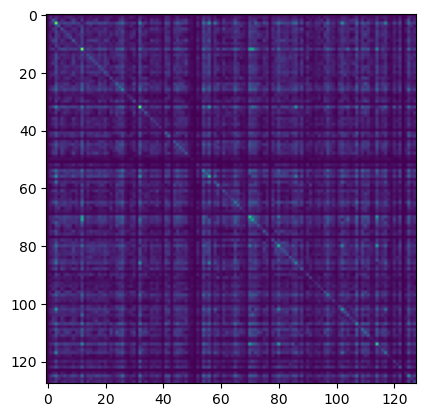

In [64]:
plt. imshow(style_targets["block2_conv1"]. numpy()[0])

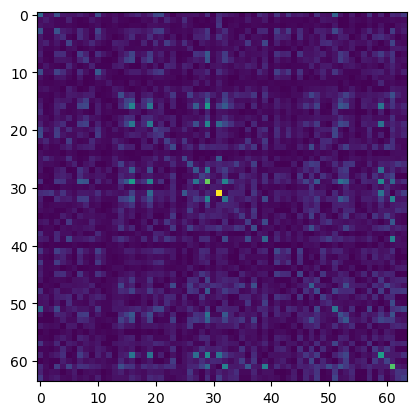

In [65]:
plt. imshow(style_targets["block1_conv1"]. numpy()[0])

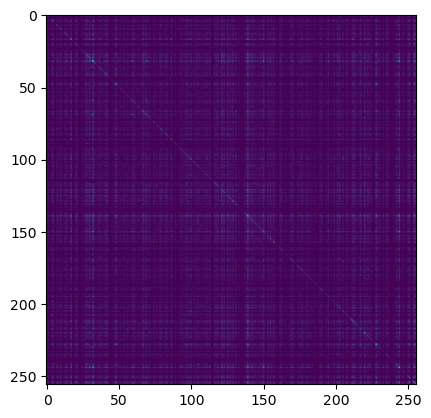

In [66]:
plt. imshow(style_targets["block3_conv1"]. numpy()[0])

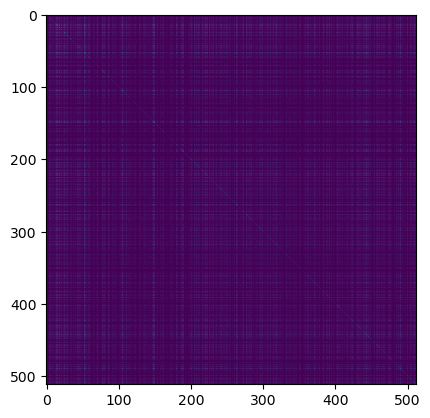

In [67]:
plt. imshow(style_targets["block4_conv1"]. numpy()[0])

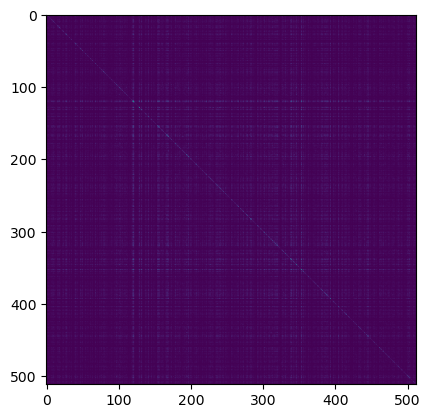

In [68]:
plt. imshow(style_targets["block5_conv1"]. numpy()[0])

In [70]:
image = tf.Variable(content_image)

In [71]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [72]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [73]:
opt

In [74]:
style_weight=1e-2
content_weight=1e4

In [75]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [76]:
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = style_content_loss(outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

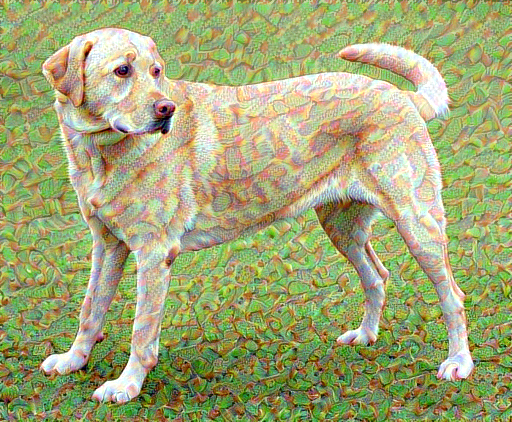

In [79]:
# Now run a few steps to test:


train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

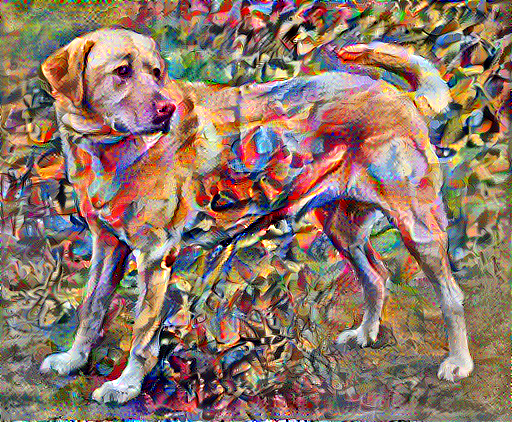

Train step: 1000
Total time: 2509.3


In [91]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='', flush=True)
    display.clear_output(wait=True)
    display.display(tensor_to_image(image))
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [81]:
for i in range(4):
    train_step(image)

In [82]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np. array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape [0] == 1
        tensor = tensor[0]
    return Image. fromarray(tensor)

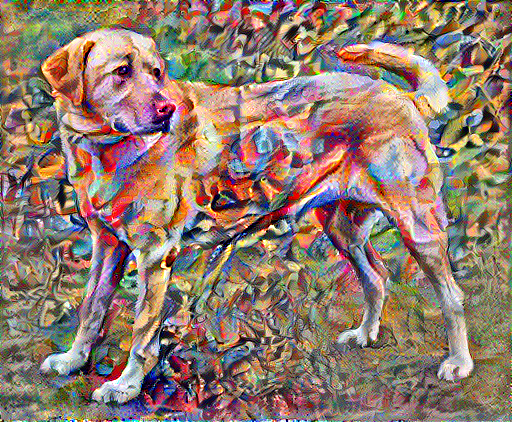

In [90]:
import IPython.display as display
from IPython.display import clear_output
from PIL import Image
epochs = 10
steps_per_epoch = 100
step = 0
for epoch in range (epochs):
    for steps in range(steps_per_epoch):
        step+=1
        train_step(image)
        display.clear_output(wait=True)
        display.display(tensor_to_image(image))

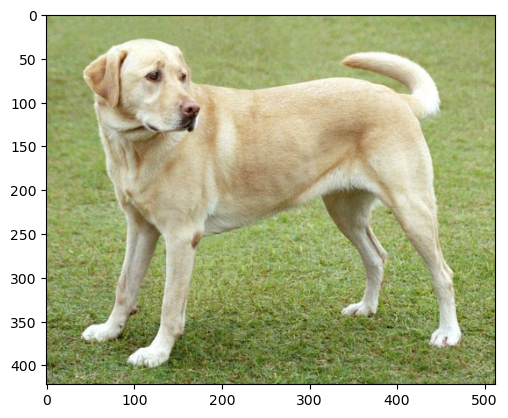

In [93]:
imshow(content_image)


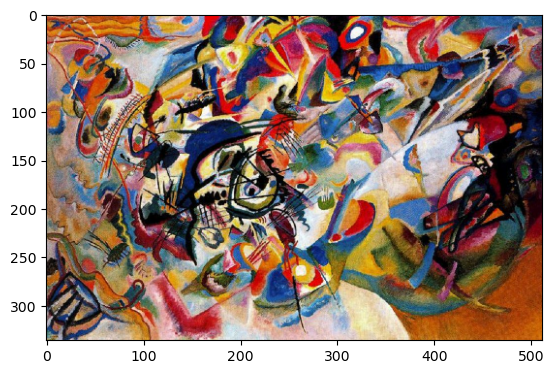

In [94]:
imshow(style_image)

In [95]:
def high_pass_x_y(image):
    x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
    y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

    return x_var, y_var

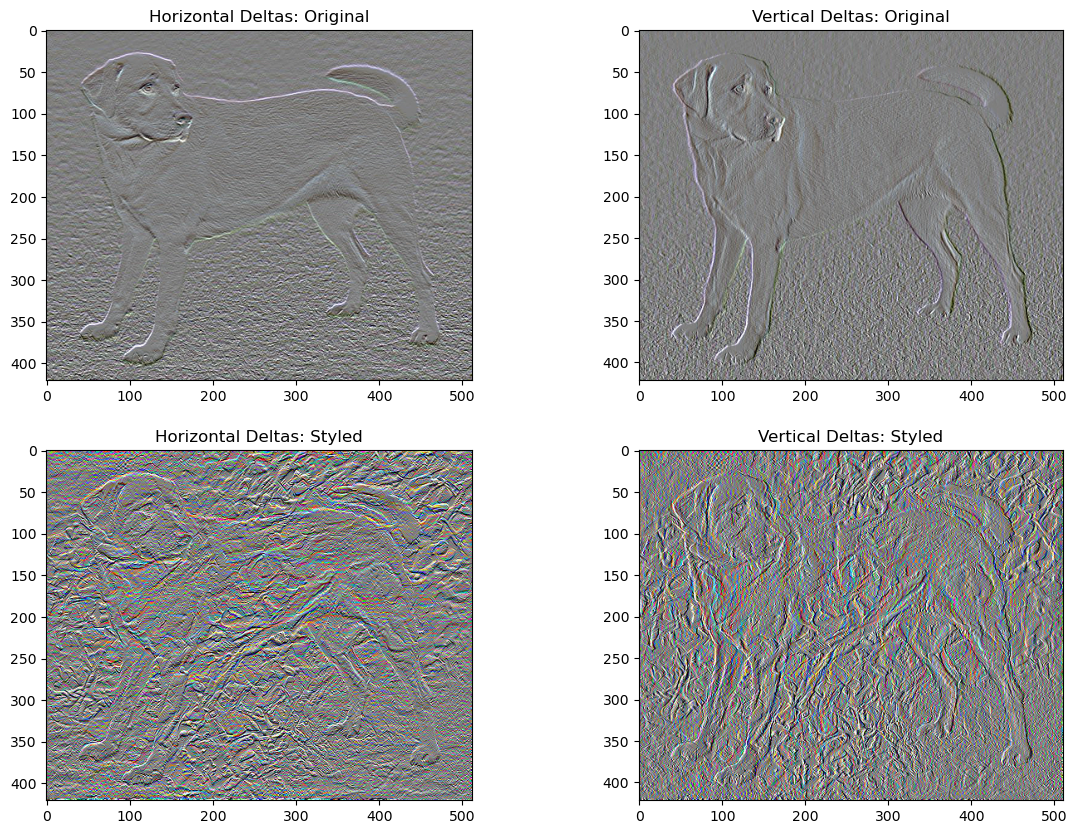

In [96]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2, 2, 2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2, 2, 3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2, 2, 4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

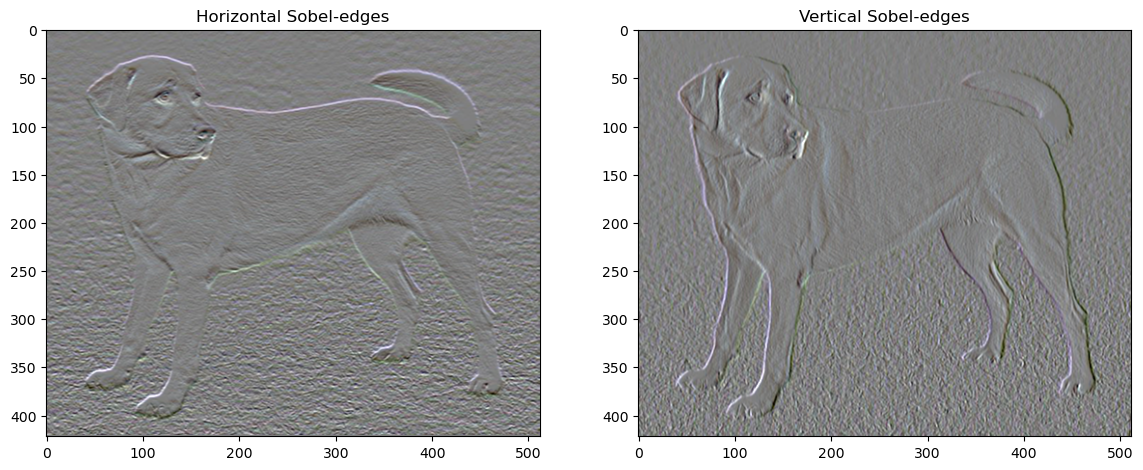

In [97]:
plt.figure(figsize=(14, 10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1, 2, 1)
imshow(clip_0_1(sobel[..., 0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1, 2, 2)
imshow(clip_0_1(sobel[..., 1]/4+0.5), "Vertical Sobel-edges")

In [98]:
def total_variation_loss(image):
    x_deltas, y_deltas = high_pass_x_y(image)
    return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [99]:
total_variation_loss(image).numpy()

146685.56

In [100]:
tf.image.total_variation(image).numpy()

array([146685.56], dtype=float32)

In [101]:
total_variation_weight=30

In [102]:
@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = style_content_loss(outputs)
        loss += total_variation_weight*tf.image.total_variation(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

In [103]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
image = tf.Variable(content_image)

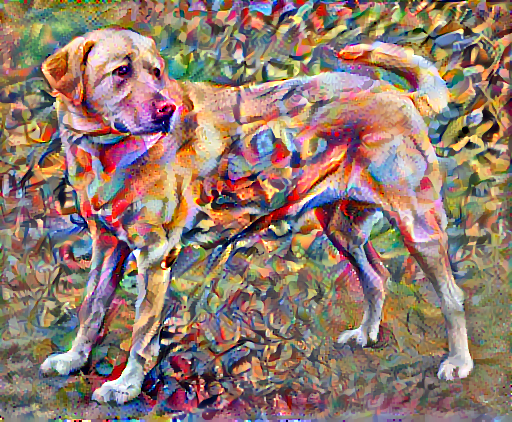

Train step: 1000
Total time: 2544.7


In [104]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='', flush=True)
    display.clear_output(wait=True)
    display.display(tensor_to_image(image))
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [106]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)
